<a href="https://colab.research.google.com/github/FranciscaAlliende/APS-Failure-at-Scania-Trucks/blob/master/ScaniaTrucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEPS:
1. basic_prepro
 - input: raw dataset
 - output: basic preprocessesed dataset
2. null_values
 - input: basic preprocessesed train + test sets
 - output: y_train, X_train, y_test, X_test, wihout null values
 * hyperparameter. t: % of null values for a feature to be consideR: set at 50%
3. unbalanced classes (downsampling or SMOTE)
 - input: y, X unbalance pair
 - output: y, X balanced pair
 * hyperparameter: SMOTE number of neighbors: set at 100
4. dimensionality reduction(Random Forest or PCA)
 - input: X_train, y_train after unbalanced class and X_test after null_values
 - output: X_train and X_test with the selected features
 * hyperparameters:
    - Random Forest: n_estimators: set at 100 and g: feature importance (gini) threshold, set after vizualizing the corresponding graph at 0.02 for downsampling and 0.015 for upsampling.  
    - PCA: nc: number of components, set at 20
    


In [2]:
import pandas as pd
import basic_prepro as bp
import null_values as nv
import unbalanced_classes as uc
import dim_reduction as dr

In [3]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_training_set.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_test_set.csv')

In [4]:
# basic prepocessing
train = bp.data_prepro(train)
test = bp.data_prepro(test)

In [5]:
# null values
[y_train, X_train, y_test, X_test] = nv.null_values(train, test, t=0.5)

In [6]:
# downsampling
[y_down_train, X_down_train] = uc.downsampling(y_train, X_train)

In [7]:
# upsampling
[y_up_train, X_up_train] = uc.mySMOTE(y_train, X_train, 100)

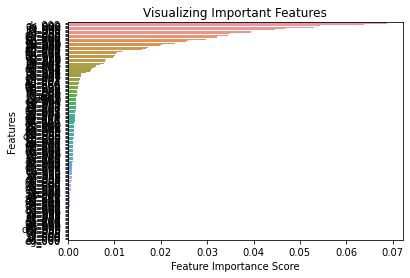

N selected features: 17


In [8]:
# dimensionality reduction RF + downsampling
[X_train_down_RF, X_test_down_RF] = dr.RF(X_down_train, y_down_train, X_test, n_estimators=100, g=0.02)

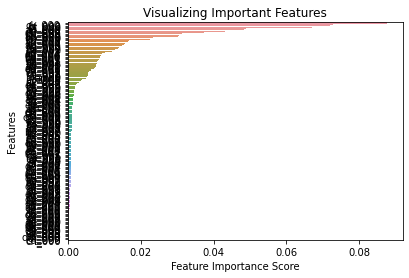

N selected features: 17


In [9]:
# dimensionality reduction RF + downsampling
[X_train_up_RF, X_test_down_RF] = dr.RF(X_up_train, y_up_train, X_test, n_estimators=100, g=0.015)

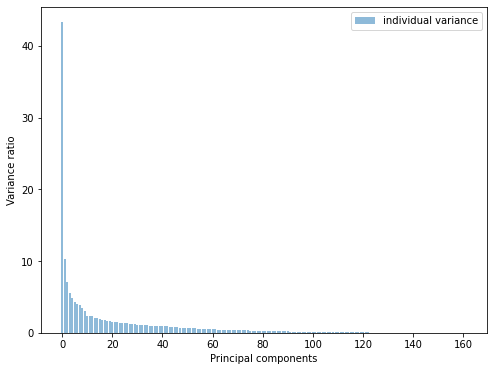

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-4.386972,0.182722,0.023445,0.704430,-0.306958,0.198378,0.427555,-0.472038,0.067318,0.147331,0.372715,0.080118,0.176877,-1.026612,-0.967851,1.287521,-1.334652,0.767502,0.786909,-0.390764,-0.010367,0.610549,-0.494269,-0.033615,0.031427,-0.044741,-0.313030,0.209899,-0.179503,0.013018,-0.179616,-0.385149,0.057605,-0.046710,-0.062579,-0.148465,-0.242941,-0.276415,0.336620,-0.209869,-0.408504,0.086309,0.137542,0.379626,0.126898,-0.303315,-0.184087,-0.145398,-0.003023,-0.116854,0.448807,-0.040534,0.289188,0.164578,-0.357404,0.071559,-0.630174,-0.076402,0.062723,-0.020564,0.104656,-0.189224,0.033243,0.400819,-0.104282,0.051533,0.272691,0.263833,0.108294,-0.300174,0.046617,0.195920,0.085015,-0.009901,-0.036435,-0.410205,0.116393,0.181113,-0.182973,0.067921
1,-5.701324,-0.374298,0.813717,-0.523498,0.002349,0.194421,-0.129103,0.146050,-0.090175,-0.082400,-0.075887,-0.247994,-0.268807,0.264356,0.622942,-0.833936,0.114895,-0.187501,-0.064392,0.142850,-0.188074,-0.527295,0.012033,0.133832,-0.028764,-0.242650,-0.138233,-0.263422,0.803160,-0.361641,-0.117926,0.312719,-0.164172,0.031043,0.131472,0.198988,0.672629,1.598210,-1.691744,0.827575,0.136740,-0.310311,-0.951308,-0.189516,0.194260,0.641609,0.174910,0.061000,-0.333608,0.097753,-0.221315,0.145108,-0.226722,-0.238278,0.487870,0.038861,0.472625,-0.125102,-0.036100,-0.086831,-0.091288,0.004151,-0.138732,-0.126494,-0.122544,-0.042225,0.086383,-0.096610,-0.036892,-0.204460,-0.069973,0.101722,0.054771,-0.121587,-0.040464,-0.080750,0.088021,0.050893,0.005026,-0.035998
2,3.693137,-2.192304,-4.030361,-1.694283,-0.862544,2.920372,-0.307533,-0.587658,-0.784771,0.256773,-1.451802,1.947952,-1.971537,0.619380,-0.266550,-1.161295,0.137777,1.437971,-0.088510,-0.726121,0.245624,0.175993,0.087583,0.513538,-0.099088,-0.357121,0.167016,-0.324345,-1.425769,0.856067,-2.232086,0.864731,1.205638,-0.554099,0.028729,0.341601,-1.026122,-0.341714,0.559839,-0.365606,-0.253616,-0.638535,0.397239,-1.440449,0.089057,0.269906,0.706103,-1.215339,-2.823903,-0.361285,-1.870346,-1.204374,-0.810191,-1.095381,0.505415,0.754020,-0.515156,-0.777199,-0.573465,1.376823,0.724990,-0.231144,1.079004,-1.021840,-0.650565,-2.082081,0.935624,-0.187917,1.085766,-0.033661,-0.490714,0.681763,0.500396,-2.125087,0.694640,0.649312,1.433494,-0.435940,0.832179,1.082398
3,-3.355357,0.791422,0.425593,-1.042387,0.563933,0.415111,0.903543,0.173968,-0.040832,-0.398093,-0.207425,0.061908,0.244900,-0.333574,-0.256369,-0.954678,0.145526,-0.390246,-0.050303,0.369273,-0.346302,-0.194937,-0.016343,-0.033841,-0.064066,-0.162880,0.101045,0.236207,0.055625,0.196653,0.371114,-0.464645,-0.327206,-0.078809,-0.422674,-0.148974,-0.009771,0.117203,0.730415,-0.212989,0.247279,-0.419824,-0.027607,0.160271,0.352365,-0.416881,0.496580,0.131098,0.588550,0.483115,-0.186502,-0.035040,-0.119142,-0.032886,0.198421,-0.092583,0.291020,0.246429,0.113127,-0.309269,-0.361271,0.411593,0.195743,0.215322,-0.243937,-0.369384,0.561925,0.124830,-0.490324,0.215196,-0.277670,-0.327925,-0.017458,-0.327095,-0.135601,0.064463,0.076759,0.006684,-0.257324,-0.005961
4,-4.734383,-0.357266,0.250362,-0.219095,0.013677,0.001194,-0.057083,-0.061220,-0.025249,0.032285,-0.112881,0.319704,-0.079385,-0.189823,-0.312606,0.556253,-0.047251,0.223611,0.146658,-0.092252,0.029249,0.378918,-0.151784,-0.118432,0.025944,0.062320,-0.019379,0.064820,-0.230354,0.001706,-0.109487,-0.098998,0.042174,0.030203,-0.013806,-0.006402,-0.250839,-0.283433,0.248113,-0.142108,-0.123227,0.069940,0.120398,-0.011181,0.043776,-0.016032,-0.091560,0.046507,0.021831,-0.149867,-0.070833,-0.059899,0.008356,0.083048,-0.177028,-0.057926,-0.037815,0.096747,0.000906,0.039893,0.041839,0.034834,-0.008259,0.005478,-0.003349,0.050431,-0.072951,-0.058798,0.124254,0.121961,-0.040160,0.045688,-0.027017,0.015608,0.0

In [10]:
# dimensionality reduction PCA + upsampling
X_train_down_PCA = dr.myPCA(X_down_train, 80)
X_train_down_PCA.head()

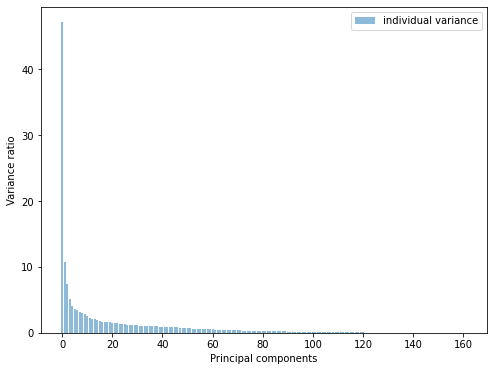

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-3.958219,-0.629291,0.507170,0.376588,0.328737,0.078198,0.463305,0.604680,-0.009928,0.879291,0.143551,-0.033293,-0.349704,0.551891,-0.609031,0.241180,-0.241141,0.271890,-0.147345,-0.123099,-0.559713,0.022041,0.324724,-0.025586,0.324295,0.499098,-0.930379,-0.434148,-0.457430,0.064648,1.106715,0.716782,0.529172,0.390645,0.034501,-0.080977,-0.201383,0.099194,0.287918,1.277411,-1.565054,-1.177944,-0.153819,0.262713,0.303208,-1.227590,-0.987045,-0.631003,0.171291,0.186435,-0.390102,-0.225613,-0.622398,0.176563,-0.072260,0.291400,-0.251420,0.132043,-0.182504,-0.100623,0.051394,0.048479,-0.033286,0.353714,0.002444,0.288114,-0.123040,-0.648236,0.162733,0.168985,-0.113222,-0.229579,-0.282488,0.251915,-0.143457,-0.483828,-0.216931,-0.315516,-0.450350,0.009709
1,-5.059761,-0.655364,-0.124651,0.417366,-0.080226,-0.107169,0.039826,-0.043896,-0.009507,-0.053569,-0.137655,-0.240598,0.014159,0.105823,-0.151928,0.064781,0.243553,-0.148746,-0.143551,0.229347,-0.313024,-0.040033,0.188108,-0.134444,0.162096,-0.122107,0.103344,-0.035728,-0.006485,-0.332406,0.040663,0.009713,-0.260665,-0.039789,0.069132,-0.013824,-0.019995,-0.104486,-0.295462,0.132487,0.382864,0.050230,0.386921,0.312408,0.006084,-0.120228,0.086543,-0.181081,0.225434,-0.755264,-0.022811,0.405958,0.422072,0.079837,0.179702,-0.194259,0.742134,-1.213433,0.481877,0.064060,1.325486,-0.469541,0.665375,0.014035,-0.043838,-0.138536,-0.328054,0.338301,0.264185,-0.238417,0.213207,-0.311936,0.156762,-0.168571,0.074222,-0.020297,0.194030,0.095032,-0.271381,-0.283861
2,-5.323817,-0.597351,-0.429062,0.590650,0.022494,0.140460,-0.337350,-0.075461,-0.010115,0.031205,-0.147110,0.359828,-0.084708,-0.193512,0.406107,-0.687207,-0.185261,0.247274,0.060559,-0.453526,0.249093,-0.003784,-0.144005,0.165887,-0.039398,0.003372,-0.067225,0.095441,0.090508,0.073616,-0.195477,-0.023732,-0.199555,-0.200467,0.076452,0.042528,-0.069337,-0.010895,0.037272,-0.375295,0.216689,0.320385,-0.156879,-0.072733,-0.183418,0.108357,0.097157,0.067622,0.034697,0.023613,0.167129,0.083309,-0.064460,0.014620,0.007884,0.004312,-0.040262,0.000761,-0.062978,0.079056,-0.027096,0.036723,0.064870,-0.047233,-0.039997,0.094180,-0.013916,-0.047858,0.009651,0.017989,0.041306,-0.013162,0.033427,0.004978,0.000678,0.036821,0.035196,-0.090391,-0.134838,0.043014
3,-6.041174,-0.575156,-0.710871,0.442289,-0.003815,-0.035560,-0.468769,-0.128755,-0.011792,-0.546406,0.535948,0.099933,-0.130276,-0.380100,1.157391,-0.970601,0.472981,0.110734,-0.237678,-0.164096,0.293758,0.074515,-0.172855,0.409121,-0.359895,-0.702987,-0.193422,-0.503369,0.145168,0.408383,-0.079048,-0.090601,-0.618550,1.062976,0.155283,-0.028653,-0.604367,-0.840120,0.499893,-0.193698,0.272518,0.509337,0.149462,0.040057,-0.139640,0.157838,0.035241,0.276159,0.309271,0.111874,0.381200,-0.040655,0.013465,0.122509,-0.014379,-0.031198,-0.274033,0.249538,-0.100254,0.236433,-0.154840,0.024289,0.041838,0.141780,-0.106165,0.041840,-0.019017,-0.013885,0.112596,-0.044133,-0.055321,-0.006361,0.098288,-0.189138,-0.284329,0.083212,0.015324,-0.073591,0.019988,-0.065349
4,-4.633425,-0.344265,0.113125,0.160483,0.066534,0.018884,-0.022318,0.217093,-0.005138,0.433618,-0.034956,-0.158269,0.120128,0.346124,-0.670085,0.700674,-0.259256,-0.211319,0.124980,0.364642,-0.248698,-0.055197,0.173402,-0.014531,-0.002107,0.008445,0.192450,-0.072399,0.014024,-0.181938,-0.144185,-0.134531,-0.186316,-0.098818,0.009374,0.016842,-0.036157,-0.045281,-0.003444,-0.180510,0.183225,0.186468,-0.070808,0.061264,-0.101497,0.076885,0.112012,0.016526,0.051447,0.083126,0.021206,0.103907,-0.030241,-0.086191,0.026428,-0.052217,-0.155435,-0.144286,0.045023,0.042111,-0.024668,0.050879,0.060692,-0.052972,0.025666,0.052443,0.132349,-0.244799,0.076987,-0.059141,0.180383,-0.011246,0.215658,-0.053320,0.016416,-0.049

In [11]:
# dimensionality reduction PCA + upsampling
X_train_up_PCA = dr.myPCA(X_up_train, 80)
X_train_up_PCA.head()